In [31]:
import pandas as pd
import numpy as np

# Bring the Data Here

In [32]:
# X data>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
x_train = pd.read_parquet("train_processed.parquet")
x_valid = pd.read_parquet("valid_processed.parquet")
x_test = pd.read_parquet("test_processed.parquet")

# Y data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
y_train = pd.read_parquet("scaled_y_train.parquet")
y_valid = pd.read_parquet("scaled_y_valid.parquet")
y_test = pd.read_parquet("scaled_y_test.parquet")

In [33]:
x_test.shape

(11088, 54)

In [34]:
y_test.shape

(11088, 1)

In [81]:
from time import time
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, explained_variance_score
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [82]:
import catboost
from catboost import CatBoostRegressor

In [84]:
regressors = [LinearRegression(), Lasso(), Ridge(), ElasticNet(),
                PLSRegression(), KNeighborsRegressor(),GradientBoostingRegressor(),ExtraTreesRegressor(),
                RandomForestRegressor(),DecisionTreeRegressor(),LGBMRegressor(),XGBRegressor(),catboost.CatBoostRegressor(),SVR(kernel="rbf")]

In [39]:
regressors_test = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]

In [85]:
for model in regressors:
    start = time()
    model.fit(x_train,y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(x_valid)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_valid, y_pred))
    print('\tRMSE: %f' % np.sqrt(mean_squared_error(y_valid, y_pred)))
    print("\tMean absolute error:", mean_absolute_error(y_valid, y_pred))
    print("\tR2 score:", r2_score(y_valid, y_pred))
    print()

LinearRegression()
	Training time: 0.229s
	Prediction time: 0.006s
	Explained variance: 0.3898255125374013
	RMSE: 0.781185
	Mean absolute error: 0.5096579636565369
	R2 score: 0.3897493480942986

Lasso()
	Training time: 0.050s
	Prediction time: 0.003s
	Explained variance: 0.0
	RMSE: 1.000000
	Mean absolute error: 0.6970455718461427
	R2 score: 0.0

Ridge()
	Training time: 0.023s
	Prediction time: 0.000s
	Explained variance: 0.38983524981123674
	RMSE: 0.781176
	Mean absolute error: 0.5092892244423958
	R2 score: 0.38976369458895277

ElasticNet()
	Training time: 0.056s
	Prediction time: 0.002s
	Explained variance: 0.0
	RMSE: 1.000000
	Mean absolute error: 0.6970455718461427
	R2 score: 0.0

PLSRegression()
	Training time: 0.099s
	Prediction time: 0.007s
	Explained variance: 0.3588930797819032
	RMSE: 0.800783
	Mean absolute error: 0.5239412879374671
	R2 score: 0.3587469619330048

KNeighborsRegressor()
	Training time: 0.006s
	Prediction time: 11.711s
	Explained variance: 0.3588919752806369
	RM

# Model Testing on Test data

# XGB Boost

In [54]:
finalmodel = [XGBRegressor(),RandomForestRegressor(),CatBoostRegressor()]


In [57]:
datasave = pd.DataFrame(y_test)
for model in finalmodel:
    start = time()
    model.fit(x_train,y_train)
    train_time = time() - start
    start = time()
    y_hat = model.predict(x_test)
    predict_time = time()-start
    data = pd.DataFrame(y_hat)
    datasave = pd.concat([datasave,data],axis=1)    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_hat))
    print('\tRMSE: %f' % np.sqrt(mean_squared_error(y_test, y_hat)))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_hat))
    print("\tR2 score:", r2_score(y_test, y_hat))
    print()

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
	Training time: 5.241s
	Prediction time: 0.016s
	Explained variance: 0.5640369751698644
	RMSE: 0.660283
	Mean absolute error: 0.4258992781860221
	R2 score: 0.56402638454808

RandomForestRegressor()
	Training time: 62.131s
	Prediction time: 0.448s
	Explained variance: 0.5657494016893005
	RMSE: 0.658979
	Mean ab

In [66]:
datasave.columns.values[0] = 'original'
datasave.columns.values[1] = 'XGB'
datasave.columns.values[2] = 'RF'
datasave.columns.values[3] = 'CAT'

In [67]:
datasave

,original,XGB,RF,CAT
0,-1.526742,-1.631307,-1.480812,-1.555635
1,-0.239541,0.162583,-0.120318,0.146510
2,-0.082621,-0.266383,-0.226867,-0.217223
3,0.400040,0.422990,0.517826,0.422450
4,0.094162,-0.061474,0.279676,0.478854
...,...,...,...,...
11083,-0.353397,-0.502000,-0.345548,-0.571847
11084,-0.072113,-0.526487,-0.756228,-0.588508
11085,0.561892,0.881833,0.719089,0.776796
11086,-0.071238,-0.000676,-0.079559,-0.015052


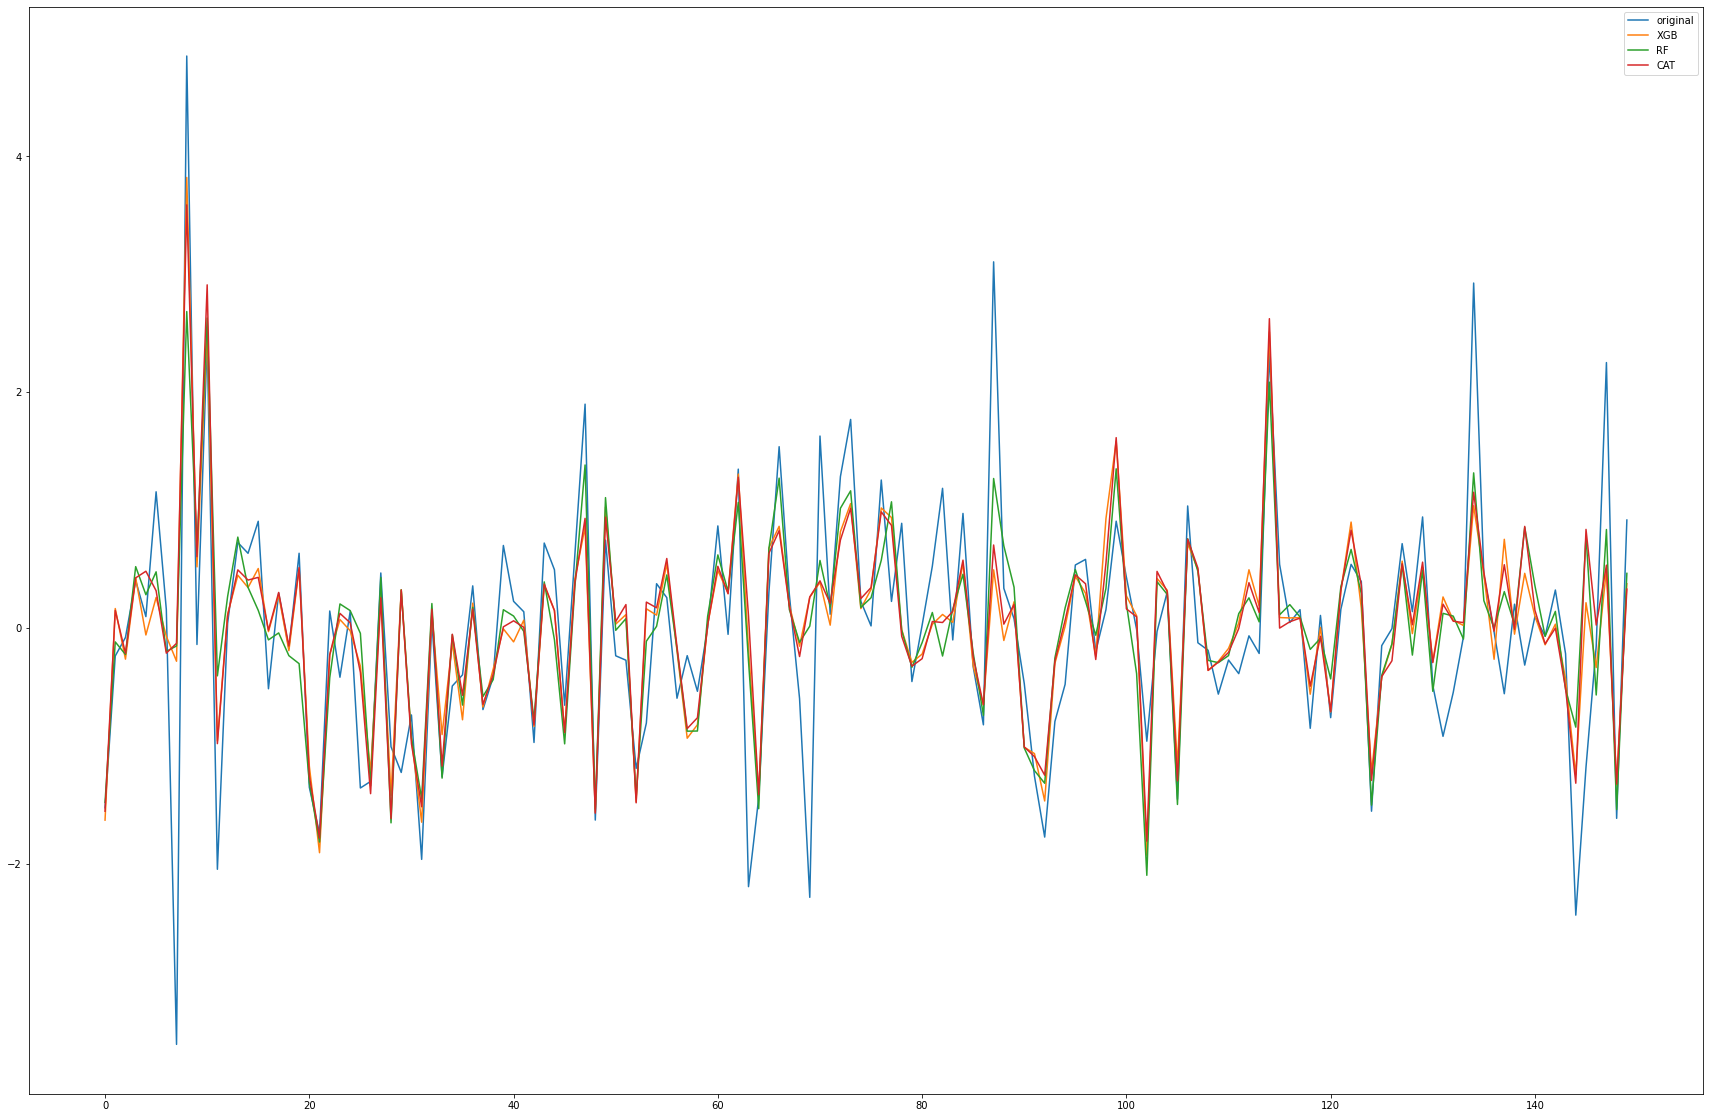

In [80]:
# Graph
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,20))
plt.plot(datasave[:150])
plt.legend(['original','XGB','RF','CAT'])